# Classification

In this example, we'll show how to use a model to predict values from your input.
We are using the Penguins dataset. We'll ask you to input a few details to classify based on parameters such as bill and flipper size. The result will be the species of that specific penguin.


In [1]:
# %pip install seaborn scikit-learn pandas sklearn-evaluation --quiet

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn_evaluation import plot, table

# Based on
# https://github.com/Adeyinka-hub/Machine-Learning-2/blob/master/Penguin%20Dataset.ipynb

## Sample our dataset
Take a look on the actual data

In [3]:
df = sns.load_dataset("penguins")

# Review a sample of the data
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
#Data cleaning
df.isnull().sum()
df.dropna(inplace=True)
Y = df.species
Y = Y.map({"Adelie": 0, "Chinstrap": 1, "Gentoo": 2})
df.drop("species", inplace=True, axis=1)
se = pd.get_dummies(df["sex"], drop_first=True)
df = pd.concat([df, se], axis=1)
df.drop("sex", axis=1, inplace=True)
le = LabelEncoder()
df["island"] = le.fit_transform(df["island"])

In [5]:
# Train the Decision Tree Classifier
X = df
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=40
)


dtc = tree.DecisionTreeClassifier()
dt_model = dtc.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Acc on test data: {:,.3f}".format(dtc.score(X_test, y_test)))

Acc on test data: 0.990


### Use sample data or use your own
The defaults in the form are part of a test dataset. You can predict your own penguin or check our model is working correctly.

In [13]:
import ipywidgets as widgets
from IPython.display import display, HTML

# Readable Mappings
def map_sex_to_numeric(sex):
    if sex == 'Male':
        return 0
    elif sex == 'Female':
        return 1
    else:
        return 

island_map = {
    0: 'Biscoe',
    1: 'Dream',
    2: 'Torgersen',
}

reverse_island_map = {
    'Biscoe': 0,
    'Dream': 1,
    'Torgersen': 2
}

species_map = {
    0: 'Adelie',
    1: 'Chinstrap',
    2: 'Gentoo',
}

# Create input widgets for each column
sample_data = X_test.iloc[0]
common_layout = widgets.Layout(width='200px')  # Adjust the width as needed

island_input = widgets.Dropdown(
    options=['Biscoe', 'Dream', 'Torgersen'],
    description='Island:',
    value=island_map[sample_data["island"]]
)

sex_input = widgets.Dropdown(
    options=['Male', 'Female'],
    description='Sex:',
    value='Male' if sample_data['Male'] else 'Female'
)

bill_length_input = widgets.FloatText(description='Bill Length (mm):', value=sample_data["bill_length_mm"])
bill_depth_input = widgets.FloatText(description='Bill Depth (mm):', value=sample_data["bill_depth_mm"])
flipper_length_input = widgets.FloatText(description='Flipper Length (mm):', value=sample_data["flipper_length_mm"])
body_mass_input = widgets.FloatText(description='Body Mass (g):', value=sample_data["body_mass_g"])

# Styling the form labels width
display(HTML('''<style>
    .widget-label { min-width: 20ex !important; }
</style>'''))

# Create a button for prediction
predict_button = widgets.Button(description='Predict')

# Create an output area for displaying predictions
output = widgets.Output()
        
# Define a function to make predictions
def predict_penguin(something):
    print(something)
    # Gather user inputs
    input_data = {
        'island': island_input.value,
        'bill_length_mm': bill_length_input.value,
        'bill_depth_mm': bill_depth_input.value,
        'flipper_length_mm': flipper_length_input.value,
        'body_mass_g': body_mass_input.value,
        'Male': map_sex_to_numeric(sex_input.value),
    }

    # Call your predict_with_decision_tree function (assuming you've defined it as in a previous response)
    input_array = pd.DataFrame([input_data])
    res = dt_model.predict(input_array)[0]

    with output:
        output.clear_output()
        print(f'Predicted Penguin Species: {species_map[res]}')

# Connect the button to the prediction function
predict_button.on_click(predict_penguin)

# Display the input form and output
display(island_input, bill_length_input, bill_depth_input, flipper_length_input,
        body_mass_input, sex_input, predict_button, output)

Dropdown(description='Island:', index=1, options=('Biscoe', 'Dream', 'Torgersen'), value='Dream')

FloatText(value=46.7, description='Bill Length (mm):')

FloatText(value=17.9, description='Bill Depth (mm):')

FloatText(value=195.0, description='Flipper Length (mm):')

FloatText(value=3300.0, description='Body Mass (g):')

Dropdown(description='Sex:', index=1, options=('Male', 'Female'), value='Female')

Button(description='Predict', style=ButtonStyle())

Output()

### Expected species with sample data:

In [7]:
print(f'Expected Penguin Species: {species_map[y_test.iloc[0]]}')

Expected Penguin Species: Chinstrap


In [8]:
X_test.iloc[1]

island                  0.0
bill_length_mm         45.5
bill_depth_mm          13.9
flipper_length_mm     210.0
body_mass_g          4200.0
Male                    0.0
Name: 266, dtype: float64

In [9]:
species_map[y_test.iloc[1]]

'Gentoo'

## Model evaluation merics

In this section, we can easily evaluate our model via a confusion matrix, and understand which feature affects our accuracy by order of importance.

<AxesSubplot: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

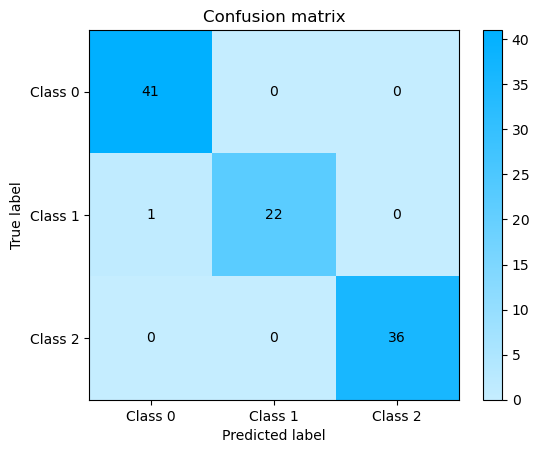

In [10]:
plot.confusion_matrix(y_test, y_pred_dt)

<AxesSubplot: title={'center': 'Feature importances'}>

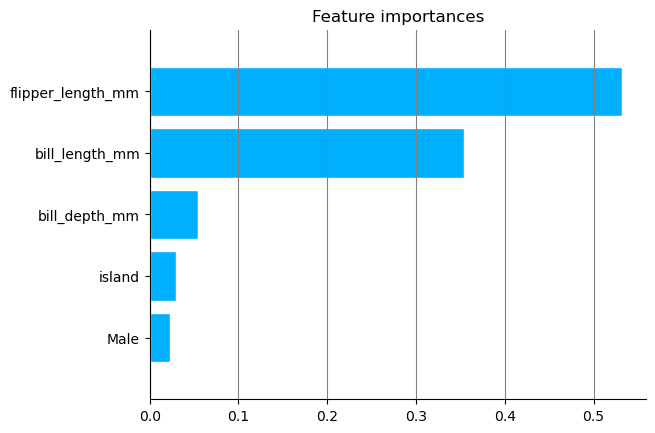

In [11]:
plot.feature_importances(dtc, top_n=5, feature_names=list(dtc.feature_names_in_))

In addition to the plot, we can also represent the importance through a table, which we can later track and query via SQL. For more information, check our [tracking guide](https://sklearn-evaluation.ploomber.io/en/latest/api/SQLiteTracker.html)

In [12]:
print(table.feature_importances(dtc, feature_names=list(dtc.feature_names_in_)))

+-------------------+--------------+
| feature_name      |   importance |
+===================+==============+
| flipper_length_mm |   0.532197   |
+-------------------+--------------+
| bill_length_mm    |   0.353682   |
+-------------------+--------------+
| bill_depth_mm     |   0.0539279  |
+-------------------+--------------+
| island            |   0.0301533  |
+-------------------+--------------+
| Male              |   0.0232564  |
+-------------------+--------------+
| body_mass_g       |   0.00678311 |
+-------------------+--------------+
